# ResNet 응용

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [ ]:
res50 = ResNet50()
res50.summary()

In [4]:
from tensorflow.keras.applications.resnet import ResNet101
res101 = ResNet101()
res101.summary()

179658752/179648224 [==============================] - 2s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                       

In [12]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving puppy.jpg to puppy.jpg


In [7]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
            width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
            width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE
   
    new_img = np.array(img.resize((width, height)))
    
    diff = abs(width - height) // 2
    if width > height:
            final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
            final_img = new_img[diff:diff+IMAGE_SIZE, :, :]
            
    return final_img

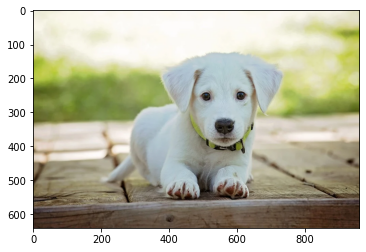

In [13]:
import matplotlib.pyplot as plt

img = Image.open('puppy.jpg')
plt.imshow(img);

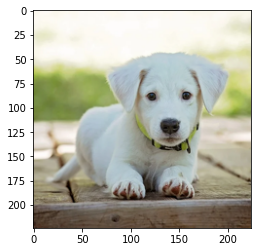

In [14]:
img = Image.open('puppy.jpg')
img2 = center_image(img)
plt.imshow(img2)

In [15]:
yhat = res50.predict(img2.reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('golden_retriever', 0.47727662)

In [16]:
yhat = res101.predict(img2.reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('Labrador_retriever', 0.96562564)